# Procesamiento de Imágenes Digitales

Visión Computacional 2018-19 <br>
Practica 1. 3
de octubre de 2018

Este enunciado está en el archivo "PracticaPI2018.ipynb" o su versión "pdf" que puedes encontrar en el Aula Virtual.

## Objetivos


Los objetivos de esta práctica son:
* Programar algunas de las rutinas de transformaciones puntuales de procesamiento de imágenes y analizar el resultado de su aplicación.
* Repasar algunos conceptos de filtrado de imágenes y programar algunas rutinas para suavizado y extracción de bordes.
* Implementar un algoritmo de segmentación de imágenes y otro de extracción de líneas mediante la transformada de Hough.

## Requerimientos

Para esta práctica es necesario disponer del siguiente software:
* Python 2.7 ó 3.X 
* Jupyter http://jupyter.org/.
* Los paquetes "pip" y  "PyMaxFlow"
* Las librerías científicas de Python: NumPy, SciPy, y Matplotlib.
* El paquete PyGame.
* La librería OpenCV.

Las versiones preferidas del entorno de trabajo puedes consultarlas en el Aula Virtual en el archivo "ConfiguracionPC2018.txt". 

El material necesario para la práctica se puede descargar del Aula Virtual.

## Condiciones

* La fecha límite de entrega será el martes 23 de octubre a las 23:55.
* La entrega consiste en dos archivos con el código, resultados y respuestas a los ejercicios:
  1. Un "notebook" de Jupyter con los resultados. Las respuestas a los ejercicios debes introducirlas en tantas celdas de código o texto como creas necesarias, insertadas inmediatamente después de  un enuciado y antes del siguiente.
  2. Un documento "pdf" generado a partir del fuente de Jupyter, por ejemplo usando el comando ``jupyter nbconvert --execute --to pdf notebook.ipynb``, o simplemente imprimiendo el "notebook" desde el navegador en la opción del menú "File->Print preview". Asegúrate de que el documento "pdf" contiene todos los resultados correctamente ejecutados.
* Esta práctica puede realizarse en parejas.

## Instala el entorno de trabajo

En la distribución Linux Ubuntu 18.04, éstos son los comandos necesarios para instalar el entorno:
1. Instala los paquetes Python y Jupyter

    ``apt install python
    apt install python-scipy
    apt install python-numpy
    apt install python-matplotlib
    apt install python-opencv
    apt install jupyter
    apt install jupyter-nbconvert``

    Para para trabajar con la versión 3.X de Python, basta sustituir la palabra "python" por "python3" en los comandos anteriores.

2. Instala el paquete PyMaxflow

   ``pip install PyMaxflow`` o ``pip3 install PyMaxflow``
   
   Si no tienes el paquete "pip" debes instalarlo: ``apt install python-pip`` o ``apt install python3-pip``
3. Instala el paquete "pygame"

    ``apt install python-pygame`` 
    
    Si deseas trabajar en Python 3.X, la versión 18.04 de Ubuntu no tiene el paquete "python3-pygame" pero puedes instalarlo con la herramienta pip: ``pip3 install pygame``

In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from pprint import pprint as pp
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter
import math
from skimage import io, viewer
from scipy import fftpack

/home/vision/.local/lib/python3.6/site-packages/skimage/viewer/__init__.py:6: UserWarning: Viewer requires Qt
  warn('Viewer requires Qt')


## Transformaciones puntuales

En este apartado te recomiendo que uses al menos la imagen indicada, que puedes encontrar en el directorio de imágenes
del aula virtual. También puedes probar con otras que te parezcan interesantes.

**Ejercicio 1.** Carga la imagen ``escilum.tif``. Calcula
y muestra su histograma, por ejemplo,  con la función ``hist()`` de
``matplotlib.pyplot``. A la vista del histograma, discute
qué problema tiene la imagen para analizar visualmente la
región inferior izquierda.

La regíon inferior izquierda de la imagen está muy oscura y esto queda reflejado en el histograma viendo el pico de la parte izquierda (cercana al 0)

**Ejercicio 2.** Escribe una función ``eq_hist(histograma)``
que calcule la función de transformación puntual que ecualiza el histograma.
Aplica la función de transformación a la imagen anterior.
Calcula y muestra nuevamente el histograma y la imagen
resultantes, así como la función de transformación.

Discute los resultados obtenidos. ¿Cuál sería el resultado si volviésemos a ecualizar la imagen resultante?

En este ejercicio tienes que implementar la función que ecualiza el histograma. No puedes usar funciones que lo hagan por ti.

##  Filtrado

Para realizar las convoluciones utiliza la función ``convolve`` o ``convolve1d`` de ``scipy.ndimage.filters``,
segun corresponda.


Carga y muestra las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` que están contaminadas respectivamente
con ruido de tipo gaussiano e impulsional. En los siguientes ejercicios también puedes utilizar otras imágenes que te parezcan interesantes.

**Ejercicio 3.** Escribe una función ``masc_gaus(sigma, n)``
que construya una máscara de una dimensión de un filtro
gaussiano de tamaño *n* y varianza σ . Filtra las imágenes
anteriores con filtros bidimensionales de diferentes tamaños
de *n* , y/o σ.

En este ejercicio tienes que implementar la función que construye la máscara. No puedes usar funciones que construyan la máscara o realicen el filtrado automáticamente.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.



**Ejercicio 4.** Escribe una función ``masc_deriv_gaus(sigma, n)`` que construya una máscara de una dimensión de un
filtro derivada del gaussiano de tamaño *n* y varianza σ. Filtra la imagen ``corridor.jpg`` con filtros bidimensionales de derivada
del gaussiano para extraer los bordes de la imagen. Prueba con diferentes valores de *n* y/o σ.

Muestra y discute los resultados. Pinta alguna de las máscaras construidas.

**Ejercicio 5.** Compara los tiempos de ejecución de las convoluciones anteriores cuando se realizan con ``convolve1d`` en vez de con ``convolve``.
Analiza los tiempos para diferentes valores de *n* y justifica los resultados.

**Ejercicio 6.** Aplica el filtro de la mediana a las imágenes
``escgaus.bmp`` y ``escimp5.bmp`` con diferentes valores de tamaño de la ventana. Muestra y discute los resultados. Compáralos con los obtenidos en el Ejercicio 3.

Para realizar este ejercicio puedes utilizar la función ``cv2.medianBlur()`` de OpenCV, ``scipy.ndimage.median_filter()`` de SciPy o hacer tu propia función. Para ello puedes escribir una función ``mediana(img, n)`` y aplicarla a la imagen con la función ``scipy.ndimage.filters()``.



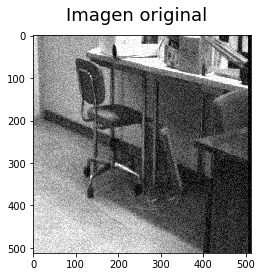

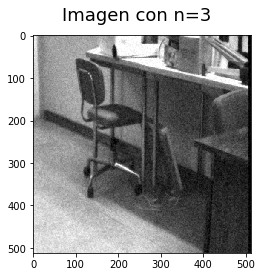

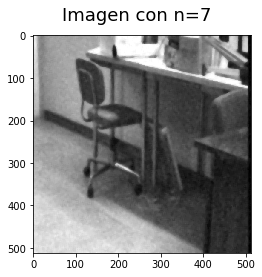

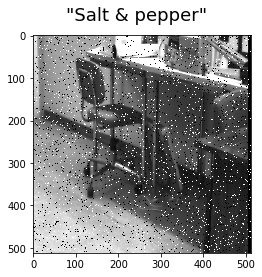

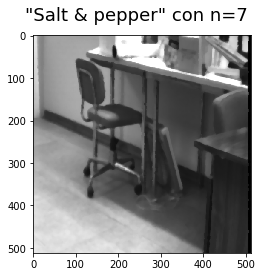

In [2]:
image = cv2.imread("imagenes/escgaus.bmp")
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('Imagen con n=3', fontsize=18)
plt.imshow(cv2.medianBlur(image,3))

fig = plt.figure()
fig.suptitle('Imagen con n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

image = cv2.imread("imagenes/escimp5.bmp")

fig = plt.figure()
fig.suptitle('"Salt & pepper"', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('"Salt & pepper" con n=7', fontsize=18)
plt.imshow(cv2.medianBlur(image,7))

### Resultado
Ante imagenes como la "escgaus.bmp" el filtro de la mediana da unos resultados semejantes a un filtro gaussiano. No obstante, cuando se intenta seguir suavizando la imagen cada vez se ve más emborronada.

Ante imagenes con el llamado ruido de "Salt & Pepper" podemos observar que el filtro de la mediana da muy buenos resultados, eliminando completamente el ruido de la imagen.

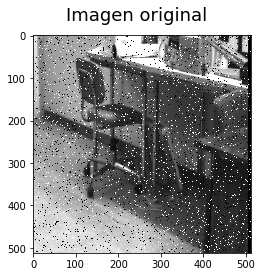

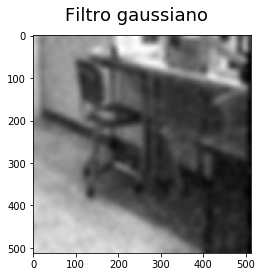

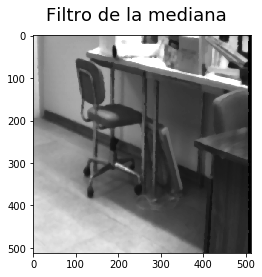

In [3]:
def masc_gaus_1d(sigma, n):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = kernel_1d / (math.sqrt(2 * np.pi) * sigma)
    
    return kernel_1d

def masc_gaus_2d(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = kernel_2d / (2 * np.pi * sigma ** 2)
    
    return kernel_2d

"""

BORRAR LAS DEFINICIONES DE ESTAS FUNCIONES EN EL DOCUMENTO FINAL (ESTARÍAN EN EL EJERCICIO 3)

TODO

TODO

TODO

TODO

TODO

TODO

TODO

TODO

"""

image = cv2.imread("imagenes/escimp5.bmp", 0)
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image, plt.cm.gray)

kernel = masc_gaus_2d(sigma = 7, n = 25)
img_convolved = convolve(image, kernel)
fig = plt.figure()
fig.suptitle('Filtro gaussiano', fontsize=18)
plt.imshow(img_convolved,plt.cm.gray)

fig = plt.figure()
fig.suptitle('Filtro de la mediana', fontsize=18)
plt.imshow(cv2.medianBlur(image,7),plt.cm.gray)

### Resultado
Como se puede observar, el filtro de la mediana ha dado mejores resultados que el filtro gaussiano a la hora de filtrar los ruidos impulsivos o los llamados ruidos de "Salt & Pepper"

**Ejercicio 7.** Utiliza la funcion ``cv2.bilateralFilter()`` de OpenCV para realizar el filtrado bilateral de una
imagen. Selecciona los parámetros adecuados y aplícalo a las imágenes ``escgaus.bmp`` y ``escimp5.bmp`` y otras que elijas tú.

Si llamamos $\sigma_r$ a la varianza de de la gaussiana que controla la ponderación debida a la diferencia entre los valores de los píxeles y $\sigma_s$ a la varianza de la gaussiana que controla la ponderación debida a la posición de los píxeles. Responde a la siguientes preguntas:
* ¿Cómo se comporta el filtro bilateral cuando la varianza $\sigma_r$ es muy alta? ¿En este caso qué ocurre si $\sigma_s$ es alta o baja?
* ¿Cómo se comporta si $\sigma_r$ es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si $\sigma_s$ es alta o baja?

Muestra y discute los resultados para distintos valores de los parámetros y varias aplicaciones sucesivas del filtro. Compáralos con los obtenidos en los Ejercicios 3 y 6.

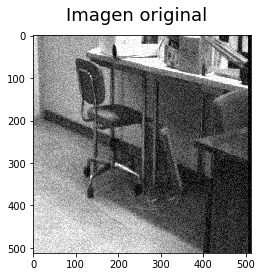

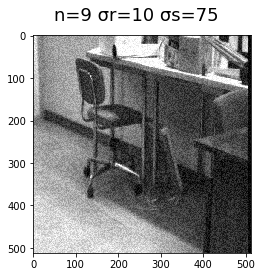

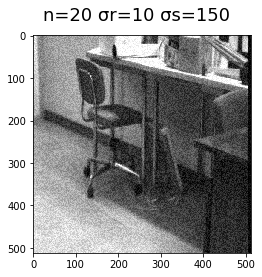

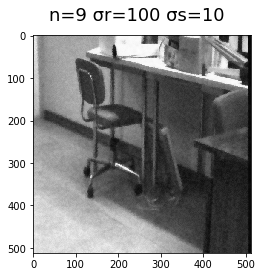

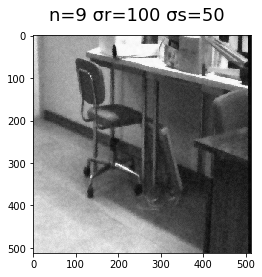

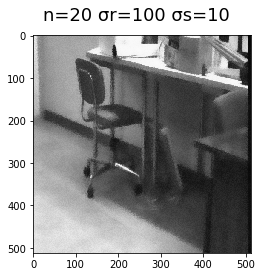

In [4]:
image = cv2.imread("imagenes/escgaus.bmp")

fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=9 σr=10 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,10,75))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=150', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,10,150))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,10))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=50', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,9,100,50))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,100,10))

### Resultado
Con escgaus.bmp y el filtro bilateral obtenemos mejores resultados que los vistos con el filtro gaussiano o el filtro de la mediana. La configuración de sigma sub-s nos permite controlar los bordes de las estructuras pequeñas que deseamos proteger mientras sigma sub-r nos permite controlar el nivel de suavizado que deseamos en la imagen.

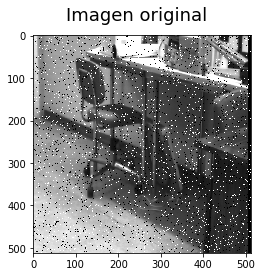

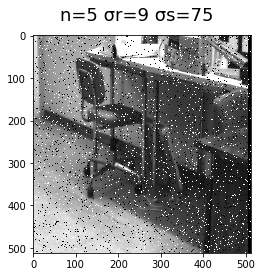

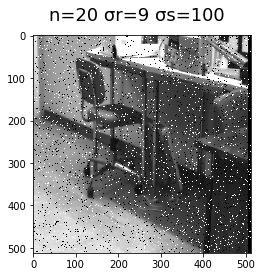

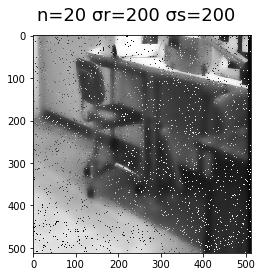

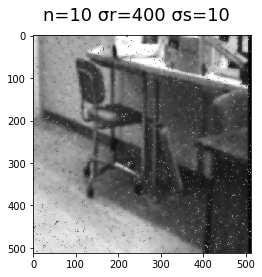

In [5]:
image = cv2.imread("imagenes/escimp5.bmp")
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

fig = plt.figure()
fig.suptitle('n=5 σr=9 σs=75', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,5,9,75))

fig = plt.figure()
fig.suptitle('n=20 σr=9 σs=100', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,9,100))

fig = plt.figure()
fig.suptitle('n=20 σr=200 σs=200', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,20,200,200))

fig = plt.figure()
fig.suptitle('n=10 σr=400 σs=10', fontsize=18)
plt.imshow(cv2.bilateralFilter(image,10,400,10))

### Resultado
A diferencia que en el apartado anterior, con una imagen con ruido de "Salt & Pepper" como puede ser escimp5.bmp el filtro biliteral no nos da buenos resultados, siendo una mejor opción usar el filtro de la mediana para quitar el ruido de "Sal & Pepper".

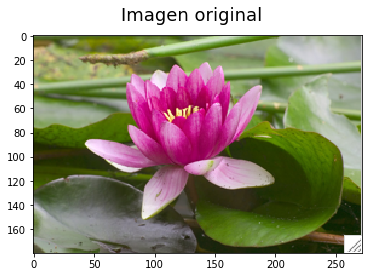

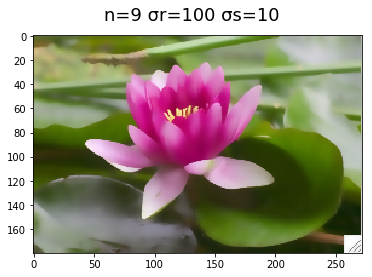

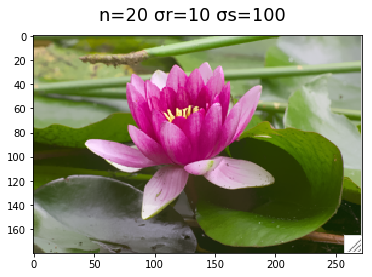

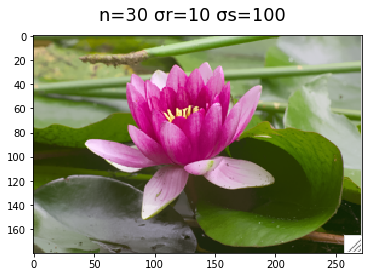

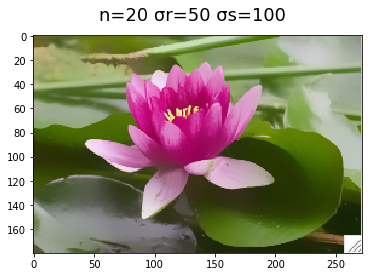

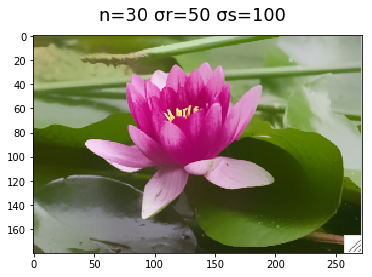

In [6]:
image = cv2.imread("imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=9 σr=100 σs=10', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,9,100,10), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=10 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,10,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,50,100), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=30 σr=50 σs=100', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,30,50,100), cv2.COLOR_BGR2RGB))

### Cuestiones
Respondiendo a las preguntas que se presentaron más arriba:
- ¿Cómo se comporta el filtro bilateral cuando la varianza 𝜎𝑟 es muy alta? ¿En este caso qué ocurre si 𝜎𝑠 es alta o baja?

- ¿Cómo se comporta si 𝜎𝑟 es muy baja? ¿En este caso cómo se comporta el filtro dependiendo si 𝜎𝑠 es alta o baja?

Para responder esta pregunta hay que entender los parámetros del filtro bilateral:
   - A medida que sigma sub-r se hace más grande el filtro bilateral se comporta cada vez más como un filtro gaussiano.
   - A medida que sigma sub-s se hace más grande el filtro bilateral suaviza estructuras cada vez más pequeñas. Con un sigma sub-s pequeño estas estructuras y bordes pequeños son protegidos en el suavizado.
 
Probémoslo con unos ejemplos:

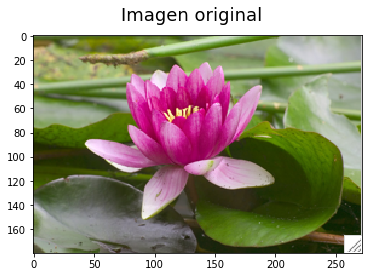

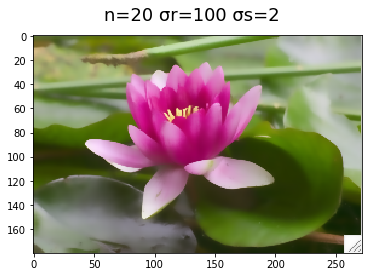

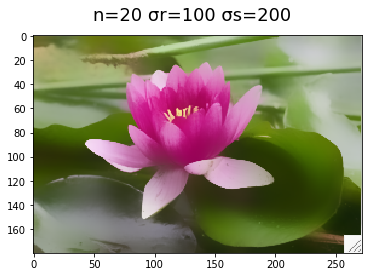

In [7]:
image = cv2.imread("imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=2', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,100,2), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=100 σs=200', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,100,200), cv2.COLOR_BGR2RGB))

### Resultado 
Para entender el filtro comparemos la segunda y tercera imagen fijandonos sobretodo en la hoja verde de la esquina inferior derecha. Como se puede observar:
   - Al tener un sigma sub-s alto (sigma sub-s = 200, tercera imagen) se ignoran los bordes de las estructuras más pequeñas, como se puede observar en la hoja verde en al tercera imagen. 
   - Al tener un sigma sub-s bajo (sigma sub-s = 2, segunda imagen) se protegen los bordes de las estructuras más pequeñas a la hora de suavizar la imagen. Esto se puede comprobar fijandose en la hoja verde en al tercera imagen.
   
Comparando la segunda imagen con la tercera podemos ver que se han protegido los bordes mucho mejor con un sigma sub-s bajo.

El tener un sigma sub-r alto afecta al nivel de suavizado de la imagen. Esto lo podremos ver en el siguiente fragmento de código:

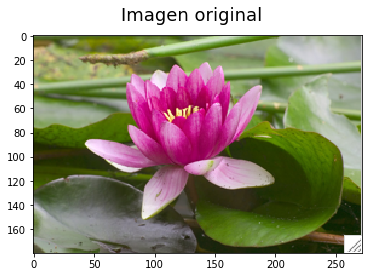

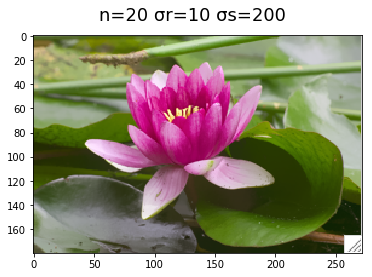

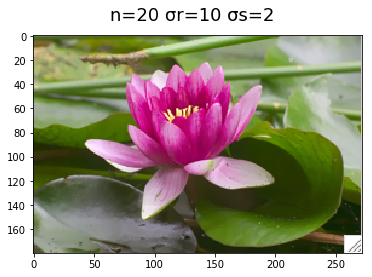

In [8]:
image = cv2.imread("imagenes/flower.png")
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=200', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,200), cv2.COLOR_BGR2RGB))

fig = plt.figure()
fig.suptitle('n=20 σr=10 σs=2', fontsize=18)
plt.imshow(cv2.cvtColor(cv2.bilateralFilter(image,20,10,2), cv2.COLOR_BGR2RGB))

### Resultado

Comparando los resultados de este fragmento de código con los resultados del anterior fragmento de código podemos ver que si sigma sub-r adquiere un valor alto la imagen se suaviza con más intensidad. Cuando sigma sub-r adquiere un valor muy alto esta empieza a comportarse como una mascara gaussiana, pero cuando adquiere un valor bajo el filtro no suaviza casi la imagen.

Por otro lado, en este ejemplo con un sigma sub-r bajo podemos ver que aunque sigma sub-s adquiera valores muy altos o muy bajos el resultado sigue siendo el mismo; al no suavizar casi la imagen, los bordes de la imagen no son alterados y la imagen resultado es muy similar a la imagen inicial. Podemos ver que con un sigma sub-r = 10 la sombra de la hoja inferior derecha ha sido suavizada, pero como ha sido un suavizado muy suave los bordes no han sido alterados y tanto en la imagen con sigma sub-s alta como en la de sigma sub-s baja los bordes siguen manteniendose.

## Transformada Hough

**Ejercicio 8.** Emplea la transformada Hough para encontrar segmentos rectilíneos en la imagen ``corridor.jpg``. Para extraer los bordes de la imagen utiliza las funciones escritas en los ejercicios 3 y 4. Utiliza la función ``cv2.HoughLinesP()`` de OpenCV.

Discute el funcionamiento para distintos valores de los parámetros de la función, así como de
los filtros utilizados para extraer los bordes de la imagen. Pinta los resultados sobre la imagen (mira como ejemplo, https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html).

In [9]:
def masc_2deriv_gaus_1d(sigma, n, order):
    width = n//2
    dx = 1
    x = np.arange(-width, width)
    kernel_1d = (sigma ** 2 - x ** 2) * np.exp(-(x ** 2) / (2 * sigma ** 2))
    kernel_1d = -kernel_1d / (math.sqrt(2 * np.pi) * sigma ** 5)
    
    return kernel_1d

def masc_2deriv_gaus_2d_x_or_y(sigma, n, orientation):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 4)) / (2 * np.pi * sigma ** 4)

    # Caso derivada en función de x
    if orientation == 1:
        kernel_2d = (-1 + (x2d ** 2 / sigma ** 2)) * kernel_2d
    # Caso derivada en función de y
    else:
        kernel_2d = (-1 + (y2d ** 2 / sigma ** 2)) * kernel_2d
    
    return kernel_2d

def masc_2deriv_gaus_2d_xy(sigma, n):
    width = n//2
    dx = 1
    dy = 1
    x = np.arange(-width, width)
    y = np.arange(-width, width)
    x2d, y2d = np.meshgrid(x, y)
    
    kernel_2d = np.exp(-(x2d ** 2 + y2d ** 2) / (2 * sigma ** 2))
    kernel_2d = (x2d * y2d / (2 * np.pi * sigma ** 6)) * kernel_2d
    
    return kernel_2d

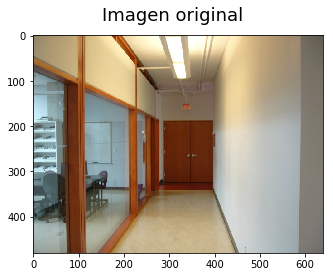

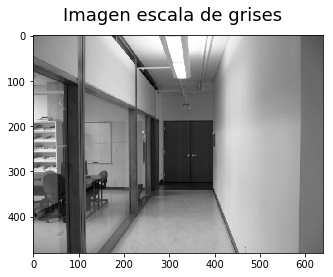

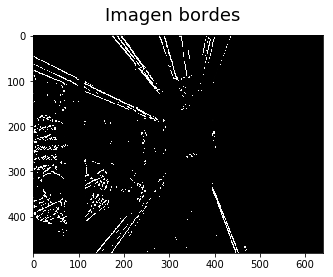

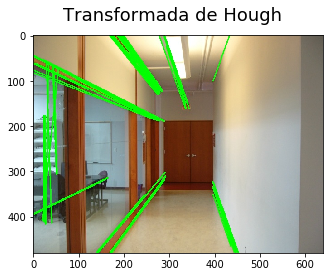

In [10]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 1.08
n = 35

image = cv2.cvtColor(cv2.imread('imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
fig = plt.figure()
fig.suptitle('Imagen escala de grises', fontsize=18)
plt.imshow(gray, cmap = plt.cm.gray)

kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Imagen bordes', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Transformada de Hough', fontsize=18)
plt.imshow(cv2.imread('imagenes/corridor_hough.jpg'))

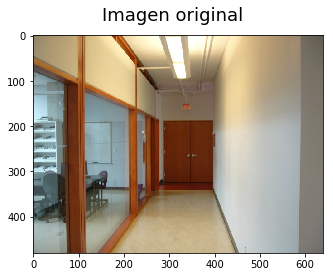

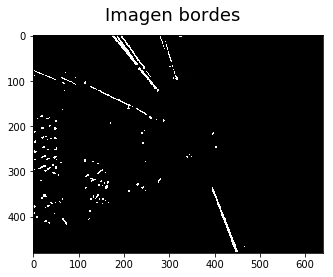

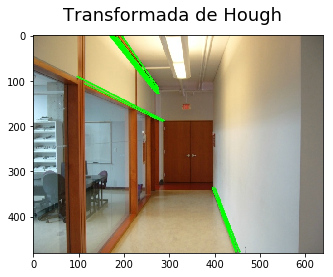

In [11]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 2.08
n = 35

image = cv2.cvtColor(cv2.imread('imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Imagen bordes', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Transformada de Hough', fontsize=18)
plt.imshow(cv2.imread('imagenes/corridor_hough.jpg'))

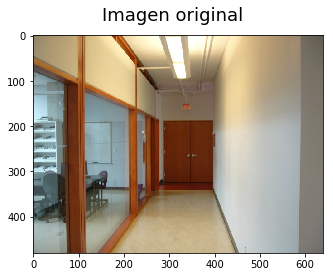

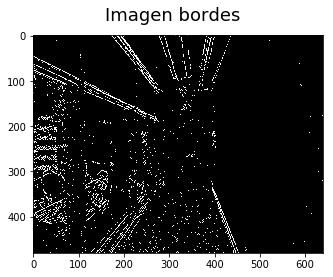

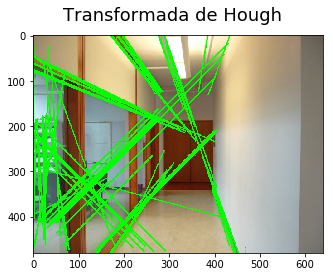

In [12]:
from scipy.ndimage.filters import convolve, convolve1d, gaussian_filter

sigma = 0.5
n = 10

image = cv2.cvtColor(cv2.imread('imagenes/corridor.jpg'), cv2.COLOR_BGR2RGB)
fig = plt.figure()
fig.suptitle('Imagen original', fontsize=18)
plt.imshow(image)

gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
kernel2D_x = masc_2deriv_gaus_2d_xy(sigma, n)
edges = convolve(gray, kernel2D_x)
fig = plt.figure()
fig.suptitle('Imagen bordes', fontsize=18)
plt.imshow(edges, cmap = plt.cm.gray)

lines = cv2.HoughLinesP(edges,rho = 1,theta = 1*np.pi/180,threshold = 100,minLineLength = 100,maxLineGap = 50)
for line in lines:
    for x1,y1,x2,y2 in line:
        cv2.line(image,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('imagenes/corridor_hough.jpg',image)
fig = plt.figure()
fig.suptitle('Transformada de Hough', fontsize=18)
plt.imshow(cv2.imread('imagenes/corridor_hough.jpg'))

### Resultado

Jugando con los distintos parametros tener unos efectos u otros: Con un sigma bajo conseguimos más bordes, mientras que con un sigma alto encontraremos bordes más escogidos y claros.

## Segmentación

**Ejercicio 9.** Escribe una función que segmente el objeto central de una imagen a partir de una segmentación manual
inicial realizada por el usuario. Puedes utilizar el código proporcionado en el archivo segm.py. En la optimización
1. toma como afinidad entre una pareja de píxeles la
diferencia en sus valores de color y;
2. sólo establece los términos unitarios de los píxeles
marcados por el usuario.

Aplícalo, al menos, a las imágenes ``persona.png`` y ``horse.jpg``. Muestra y discute los resultados.

In [13]:
#######################################################################
# This code lets you paint on top of an image and returns the painted image
# it can be used to select pixels somehow in an image
# 
# It requires that you install "python-pygame" and "python-opencv"
#
# The interesting funcion here is "select_fg_bg" read documentation below
#######################################################################
import pygame
import numpy as np
import cv2

def roundline(srf, color, start, end, radius=1):
    dx = end[0]-start[0]
    dy = end[1]-start[1]
    distance = max(abs(dx), abs(dy))
    for i in range(distance):
        x = int( start[0]+float(i)/distance*dx)
        y = int( start[1]+float(i)/distance*dy)
        pygame.draw.circle(srf, color, (x, y), radius)

def select_fg_bg(img, radio=2):
    """ Shows image img on a window and lets you mark in red, green and blue 
        pixels in the image.
        img: numpy array with the image to be labeled
        radio: is the radio of the circumference used as brush
        returns: a numpy array that is the image painted
    """
    # Creates the screen where the image will be displayed
    # Shapes are reversed in img and pygame screen
    screen = pygame.display.set_mode(img.shape[-2::-1])

#    imgpyg=pygame.image.load(imgName)
    imgpyg=pygame.image.frombuffer(img,img.shape[-2::-1],'RGB')
    screen.blit(imgpyg,(0,0))
    pygame.display.flip() # update the display

    draw_on = False
    last_pos = (0, 0)
    color_red = (255, 0, 0)
    color_green = (0,255,0)
    color_blue = (0,0,255)

    while True:
        e = pygame.event.wait()
        if e.type == pygame.QUIT:
            break;
        if e.type == pygame.MOUSEBUTTONDOWN:
            if pygame.mouse.get_pressed()[0]:
                color=color_red
            elif pygame.mouse.get_pressed()[2]:
                color=color_green
            else:
                color=color_blue
            pygame.draw.circle(screen, color, e.pos, radio)
            draw_on = True
        if e.type == pygame.MOUSEBUTTONUP:
            draw_on = False
        if e.type == pygame.MOUSEMOTION:
            if draw_on:
                pygame.draw.circle(screen, color, e.pos, radio)
                roundline(screen, color, e.pos, last_pos,  radio)
            last_pos = e.pos
        pygame.display.flip()

    imgOut=np.ndarray(shape=img.shape[:2]+(4,),dtype='u1',buffer=screen.get_buffer().raw)
    pygame.quit()

    return(cv2.cvtColor(imgOut[:,:,:3],cv2.COLOR_BGR2RGB))

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


/home/vision/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app


array([[ 73, 404],
       [ 73, 405],
       [ 74, 403],
       ...,
       [185, 293],
       [185, 294],
       [185, 295]])


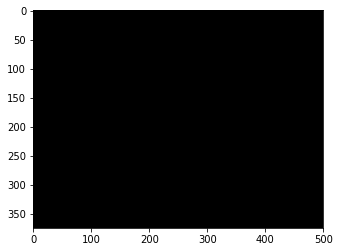

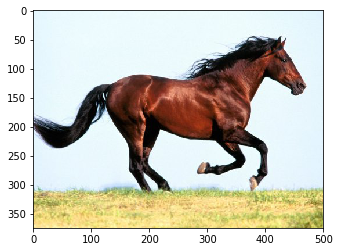

In [14]:
#################################
# Segmentacion de imagen a la "Grab Cut" simplificado
# por Luis Baumela. UPM. 15-10-2015
# Vision por Computador. Master en Inteligencia Artificial
#################################


import numpy as np
from scipy.misc import imread
import maxflow
import matplotlib.pyplot as plt

imgName='imagenes/horse.jpg'

img = imread(imgName)

# Marco algunos pixeles que pertenecen el objeto y el fondo
markedImg = select_fg_bg(img)

# Create the graph.
g = maxflow.Graph[float]()

# Add the nodes. nodeids has the identifiers of the nodes in the grid.
nodeids = g.add_grid_nodes(img.shape[:2])

# Calcula los costes de los nodos no terminales del grafo

# Estos son los costes de los vecinos horizontales
exp_aff_h=1
# Estos son los costes de los vecinos verticales
exp_aff_v=2

# Construyo el grafo 
# Para construir el grafo relleno las estructuras
hor_struc=np.array([[0, 0, 0],[1, 0, 0],[0, 0, 0]])
ver_struc=np.array([[0, 1, 0],[0, 0, 0],[0, 0, 0]])
# Construyo el grafo 
g.add_grid_edges(nodeids, exp_aff_h, structure = hor_struc,symmetric=True)
g.add_grid_edges(nodeids, exp_aff_v, structure = ver_struc,symmetric=True)

# Leo los pixeles etiquetados
# Los marcados en rojo representan el objeto
pts_fg = np.transpose(np.where(np.all(np.equal(markedImg,(255,0,0)),2)))
# Los marcados en verde representan el fondo
pts_bg = np.transpose(np.where(np.all(np.equal(markedImg,(0,255,0)),2)))
pp(pts_fg)

# Incluyo las conexiones a los nodos terminales
# Pesos de los nodos terminales
left = nodeids[:,0]
right = nodeids[:,-1]
g.add_grid_tedges(pts_bg, np.inf, 0)
g.add_grid_tedges(pts_fg, 0, np.inf)

# Find the maximum flow.
g.maxflow()
# Get the segments of the nodes in the grid.
sgm = g.get_grid_segments(nodeids)

# Muestro el resultado de la segmentacion
plt.figure()
plt.imshow(np.uint8(np.logical_not(sgm)),cmap='gray')
plt.show()

# Lo muestro junto con la imagen para ver el resultado
plt.figure()
wgs=(np.float_(np.logical_not(sgm))+0.3)/1.3

# Replico los pesos para cada canal y ordeno los indices
wgs=np.rollaxis(np.tile(wgs,(3,1,1)),0,3)
plt.imshow(np.uint8(np.multiply(img,wgs)))
plt.show()

**Ejercicio 10.** Mejora el algoritmo anterior. Puedes utilizar algunas de las que te sugiero a continuación u otras que creas más convenientes:
* Refina la segmentación iterativamente.
* Mejora la función de afinidad entre píxeles.
* Mejora los términos unitarios

mejora los resultados de algunas de las imágenes anteriores. Muestra y discute los resultados.

In [15]:
"http://bibing.us.es/proyectos/abreproy/70077/fichero/capitulo4.pdf"


'http://bibing.us.es/proyectos/abreproy/70077/fichero/capitulo4.pdf'

In [16]:
http://pmneila.github.io/PyMaxflow/tutorial.html
https://github.com/lisssb/vision/blob/master/segm.py

SyntaxError: invalid syntax (<ipython-input-16-c1dfbd45006b>, line 1)